In [209]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [210]:
# Import data files
clinical_data = pd.read_csv('Data/clinicaltrial_data.csv')
mouse_data = pd.read_csv('Data/mouse_drug_data.csv')

In [211]:
# Clean mouse_data
# Mouse ID 'g989' is duplicated in mouse_data dataframe. Actual drug administered is unknown.
mouse_data.set_index('Mouse ID', inplace=True)
mouse_data.drop('g989', inplace=True)
mouse_data.reset_index(inplace=True)

In [212]:
# Merge dataframes
trial_data = pd.merge(clinical_data, mouse_data, on='Mouse ID')
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


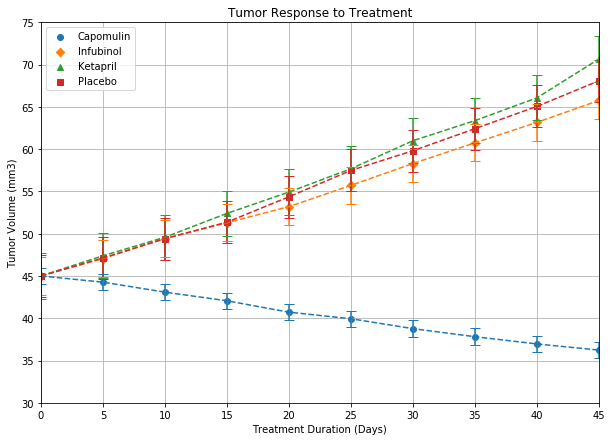

In [266]:
# Tumor Response

tumor_response = trial_data.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].mean().unstack()
tumor_table = tumor_response[['Capomulin','Infubinol','Ketapril','Placebo']]

counter = 0
markers = ['o','D','^','s']
colors = ['blue','red','green','orange']

x_axis = np.arange(0, 50, 5)
s_error = tumor_table.sem()

plt.figure(figsize=(10,7))

for column in tumor_table:
    plt.scatter(x_axis, tumor_table[column], marker=markers[counter])
    plt.errorbar(x_axis, tumor_table[column], yerr=s_error[counter], capsize=5, fmt='--')
    counter = counter + 1
plt.xlim(0,45)
plt.ylim(30,75)
plt.title("Tumor Response to Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.show()

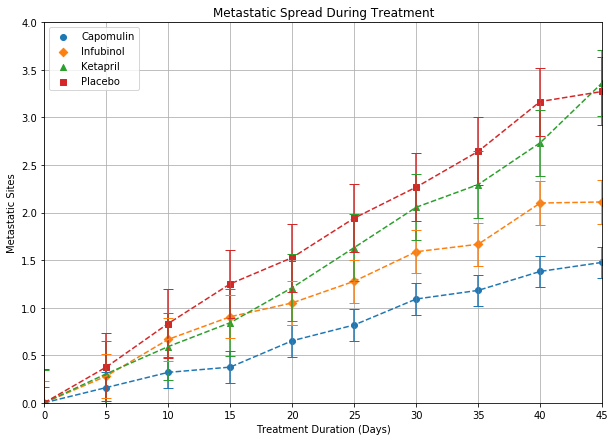

In [223]:
# Metastatic Sites

m_sites = trial_data.groupby(['Timepoint','Drug'])['Metastatic Sites'].mean().unstack()
m_sites_table = m_sites[['Capomulin','Infubinol','Ketapril','Placebo']]

counter = 0
markers = ['o','D','^','s']
colors = ['blue','red','green','orange']

x_axis = np.arange(0, 50, 5)
s_error = m_sites_table.sem()

plt.figure(figsize=(10,7))

for column in m_sites_table:
    plt.scatter(x_axis, m_sites_table[column], marker=markers[counter])
    plt.errorbar(x_axis, m_sites_table[column], yerr=s_error[counter], capsize=5, fmt='--')
    counter = counter + 1
plt.xlim(0,45)
plt.ylim(0,4.0)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.show()

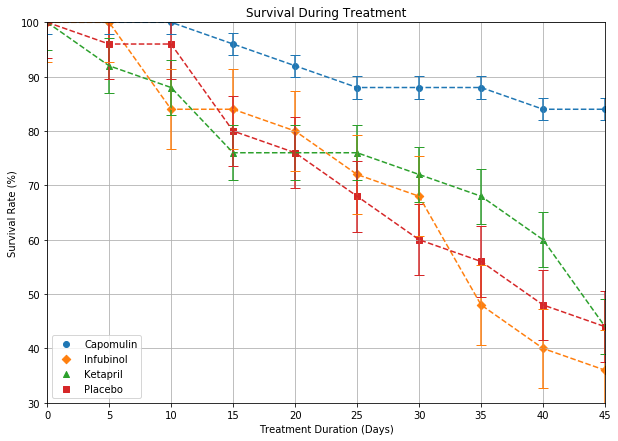

In [256]:
# Survival Rate

mice_alive = trial_data.groupby(['Timepoint','Drug'])['Mouse ID'].count().unstack()
mice_alive_table = ((mice_alive[['Capomulin','Infubinol','Ketapril','Placebo']]/25)*100).astype(int)

counter = 0
markers = ['o','D','^','s']
colors = ['blue','red','green','orange']

x_axis = np.arange(0, 50, 5)
s_error = mice_alive_table.sem()

plt.figure(figsize=(10,7))

for column in mice_alive_table:
    plt.scatter(x_axis, mice_alive_table[column], marker=markers[counter])
    plt.errorbar(x_axis, mice_alive_table[column], yerr=s_error[counter], capsize=5, fmt='--')
    counter = counter + 1
plt.xlim(0,45)
plt.ylim(30,100)
plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.show()

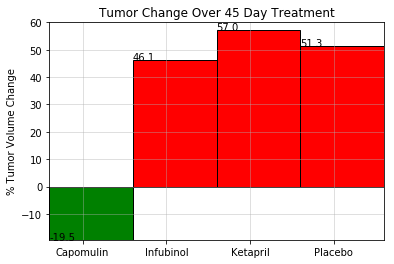

In [327]:
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
final_size = []

drug_mean = trial_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().to_frame().reset_index()

for x in range(4):
    final_size.append(drug_mean.loc[(drug_mean['Drug'] == drugs[x]) & (drug_mean['Timepoint'] == 45), 'Tumor Volume (mm3)'].values[0])

percent_change = [(x-45)/45*100 for x in final_size]
round_change = [ '%.1f' % elem for elem in percent_change ]

x_axis = np.arange(0, len(drugs), 1)
tick_loc = [x+0.4 for x in x_axis]

plt.bar(x_axis, percent_change, align='edge', width=1.0, edgecolor='black', color=['g','r','r','r'])
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.xticks(tick_loc, drugs)
plt.xlim(0, len(x_axis))
plt.grid(alpha=0.5)
plt.ylim(min(percent_change), 60)
for a,b in zip(x_axis, round_change):
    plt.text(a, b, str(b))
plt.show()